PROGETTO: CREAZIONE DI UNA RETE NEURALE OCR IN GRADO DI FARE UNA DETECTION SU TARGHE DI AUTOVEICOLI.

In [1]:
#Import delle varie librerie.
import pandas as pd     #libreria per manipolazione e analisi dei dati
import numpy as np      #libreria per array multidimensionali nparray
import matplotlib.pyplot as plt   #libreria per fare i plot(grafici)
import cv2    #libreria per la computer vision
import os     #libreria per lavorare con il sistema operativo
import glob   #libreria per ricercare file sui paths.
from IPython.display import Image, display
from lxml import etree #libreria per scorrere i file xml



PREPARAZIONE DEL DATI, OVVERO PREPROCESSING, BISOGNA AVERE LE IMMAGINI DELLA STESSA DIMENSIONE. (NON SERVE DATA AGGREGATION PERCHE' SONO ABBASTANZA I DATI DISPONIBILI ALL'INTERNO DI QUESTO DATASET)

In [8]:
SIZE_IMMAGINE = 300 #ovvero è una 300x300

#path della cartella delle immagini
cartella_immagine = 'Dataset\images'
#crea il path dei dati facendo un join tra il path della cartella che contiene l'immagini e finiscono con *g quindi tutte quelle in formato png
data_path = os.path.join(cartella_immagine,'*g')
#La funzione glob mi restituisce una lista di file contentete quel path, quindi tutte le immagini png
files = glob.glob(data_path)
#si ordinano in ordine alfabetico per farle matchare con il rispettivo file xml, che contiene la label delle varie targhe
files.sort()
#contiene tutte le immagini in formato png con il nuovo size
LISTA_IMMAGINI = []
for file in files:
    immagine = cv2.imread(file)
    immagine = cv2.resize(immagine, (SIZE_IMMAGINE,SIZE_IMMAGINE))
    #perché cv2 di default con il imread mi inverte i colori
    immagine_rgb = cv2.cvtColor(immagine, cv2.COLOR_BGR2RGB)
    LISTA_IMMAGINI.append(immagine_rgb)

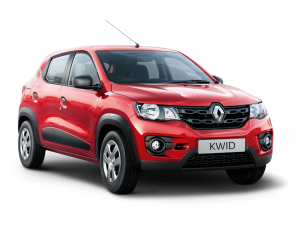

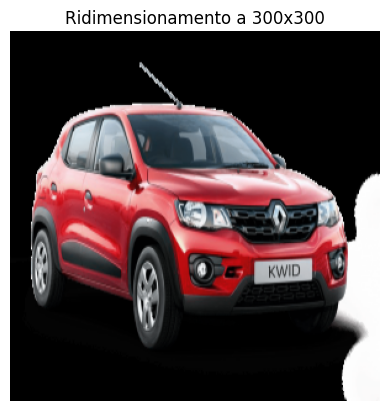

In [9]:
#Per far vedere le dimensioni originali dell'immagine 116 all'interno del database confrontata con la medesima ma a dimensione 300x300
display(Image(files[116]))
plt.imshow(LISTA_IMMAGINI[116])
plt.axis('off')  # Turn off axis labels
plt.title("Ridimensionamento a 300x300")
plt.show()



ORA AVENDO NEL DATABASE ANCHE i FILE XML DELLE RISPETTIVE IMMAGINI CHE MI DANNO LE COORDINATE (xmin,xmax,ymin,ymax) DELLE LABEL DELLE TARGHE, DEVO A SUA VOLTA RIDIMENSIONARLE IN BASE ALLA SIZE_IMMAGINE.